<a href="https://colab.research.google.com/github/macscheffer/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Copy_of_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

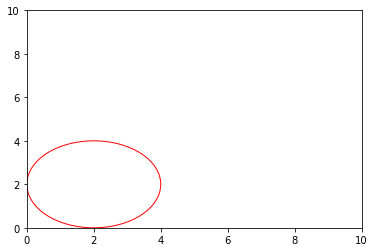

In [2]:
circle = plt.Circle((2,2), 2, color='red', fill=False)
ax = plt.gca()

ax.set_xlim((0,10))
ax.set_ylim((0,10))

ax.add_artist(circle);

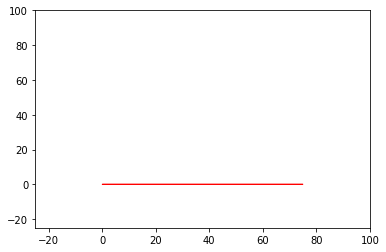

In [3]:
fig = plt.figure()
plt.arrow(0,0,75,0, color="red")

plt.xlim(-25,100)          
plt.ylim(-25,100)

plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

because a function can only map to one precise output for any given input. 

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

relation 2 is the only function that any given input only maps to one output.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

the first function's input is 3d and maps to a 1d space
the second functions input is 4d and maps to a 2d space.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

yes f(x) -> (x,0)

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [4]:
p = np.array([25,10])
tofp = np.array([[1,3],[-1,2]])

trad = np.array([p[0]+3*p[1],2*p[1]-p[0]])
print(trad)

[55 -5]


In [5]:
np.matmul(tofp, p)

array([55, -5])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

In [0]:
# the eigenvector is the line that will give the most information about the data, essentially a new coordinate plane. 
# the eigenvalue is a scalar or way to transform that eigenvector.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

In [0]:
# difficult to visualize. for example the scatter plot example from class.
# need more data 
# hard to figure out which columns arent doing much

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

5 times

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
from sklearn.decomposition import PCA

df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
df_wo_species = df.drop('species',axis='columns')

In [9]:
df_wo_species.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(df_wo_species)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [29]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [0]:
lower_dim_df = pca.transform(df_wo_species)
lower_dim_df = pd.DataFrame(lower_dim_df)
lower_dim_df

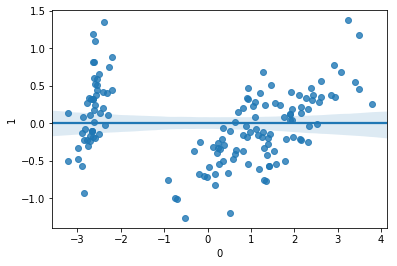

In [17]:
import seaborn as sns

sns.regplot(x=lower_dim_df[0], y=lower_dim_df[1], data=lower_dim_df)

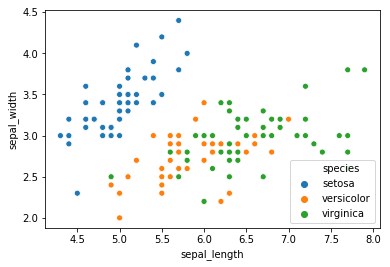

In [31]:
sns.scatterplot(x=df['sepal_length'], y=df['sepal_width'], data=df, hue='species');

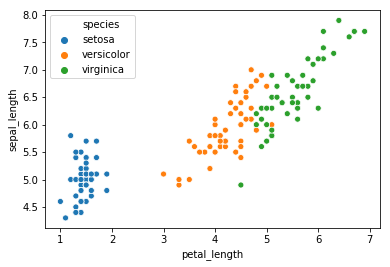

In [33]:
sns.scatterplot(x=df['petal_length'], y=df['sepal_length'], data=df, hue='species');

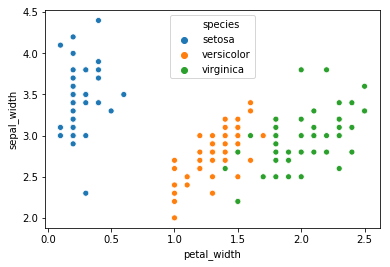

In [36]:
sns.scatterplot(x=df['petal_width'], y=df['sepal_width'], data=df, hue='species');

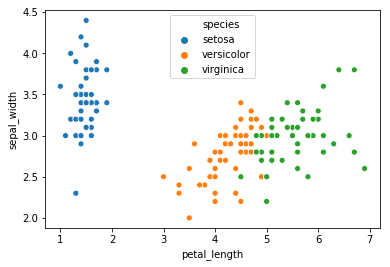

In [37]:
sns.scatterplot(x=df['petal_length'], y=df['sepal_width'], data=df, hue='species');

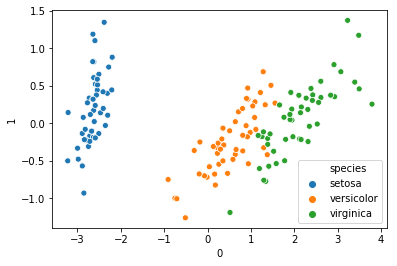

In [20]:
sns.scatterplot(x=lower_dim_df[0], y=lower_dim_df[1], data=lower_dim_df.join(df['species']), hue='species');

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)